In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import t
linmod = LinearRegression()

In [2]:
datafile = '../../dataset/ch09/bodyfat.txt'
data = pd.read_csv(datafile, sep='\t')

In [3]:
data.head()

,Density,Pct.BF,Age,Weight,Height,Neck,Chest,Abdomen,Waist,Hip,Thigh,Knee,Ankle,Bicep,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,33.543307,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,32.677165,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,34.606299,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,34.015748,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,39.370079,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
bodyfat = data['Pct.BF']
waist = data['Waist']
height = data['Height']
waist_height = data[ ['Waist', 'Height'] ]

<Axes: >

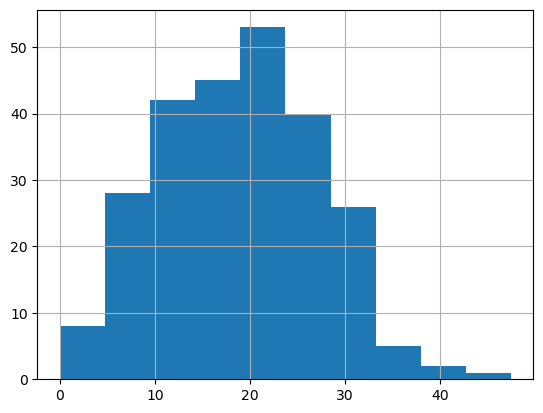

In [22]:
bodyfat.hist();

In [5]:
waist = np.array(waist).reshape(-1, 1)
linmod.fit(waist, bodyfat);
bodyfat_est = linmod.predict(waist)
r = linmod.score(waist, bodyfat)
print(f'R_squared: {r * 100:.1f}%')

R_squared: 67.8%


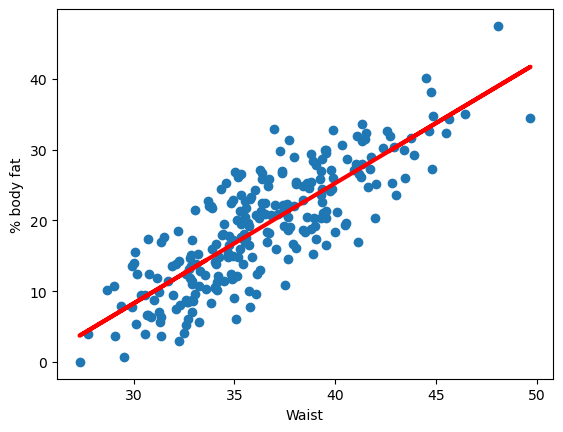

In [6]:
plt.figure()
plt.scatter(waist, bodyfat)
plt.plot(waist, bodyfat_est, color='r', lw=3);
plt.xlabel('Waist')
plt.ylabel('% body fat');

In [7]:
linmod.intercept_, linmod.coef_[0]

(-42.734133901722856, 1.6999718705027542)

The above model is about the correlation between "Body Fat Percentage" ($y$) and "Waist" ($x_1$).

The full model is $y \sim N(\mu_y, \sigma^2)$, where $\mu_y = \beta_0 + \beta_1 x_1$ ($\beta$'s are unknown coefficients), and $\sigma$ is unknown.

If one sample has 250 measurements, in theory, the 250 sample points come from 250 different Normal distributions. Although these distributions are of the same $\sigma$, their centers may be distint and linearly depend on waist.

Given this framework of OLS, we can linearly regress $y$ against $x_1$ to deduce estimates of the coefficients: $b_0 = -42.73$, $b_1 = 1.70$.

Suppose we know (of certainty) that $x_1 = 38$ for a man.  Immediately, we can say that the man's body fat obeys a normal distribution centered at $21.86\%$.  This center is estimated, because we can never know the true values of the coefficients (what we can do the best is to estimate them).  Therefore, this center may deviate from the true center.  We estimate a **Confidence Interval** for the true center based on our estimated center.

Furthermore, that man's body fat may not be exactly equal to the center of the distribution of all men's body fat with 38-inch waist size.  One man's body fat is always more uncerntain than the uncertainty of mean body fat of all men with his waist size.  We can provide a **Predication Interval** for this one man's body fat.

In [23]:
linmod.intercept_ + linmod.coef_[0] * 38

21.864797177381803

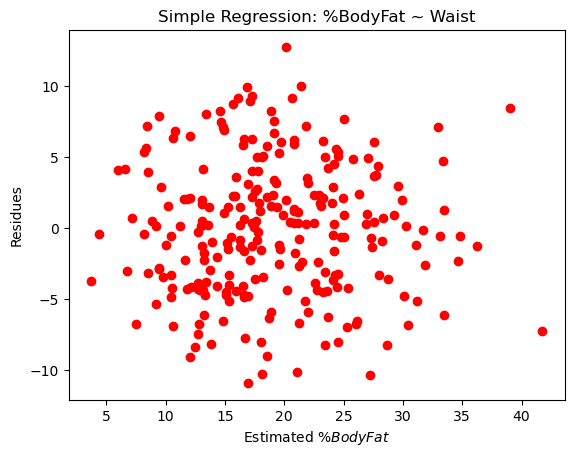

In [8]:
residues = bodyfat - bodyfat_est
plt.scatter(bodyfat_est, residues, color='r');
plt.xlabel('Estimated %$BodyFat$')
plt.ylabel('Residues')
plt.title('Simple Regression: %BodyFat ~ Waist');

In [9]:
waist = sm.add_constant(waist)

In [10]:
waist[:10]

array([[ 1.      , 33.543307],
       [ 1.      , 32.677165],
       [ 1.      , 34.606299],
       [ 1.      , 34.015748],
       [ 1.      , 39.370079],
       [ 1.      , 37.165354],
       [ 1.      , 35.708661],
       [ 1.      , 34.84252 ],
       [ 1.      , 32.480315],
       [ 1.      , 34.88189 ]])

In [11]:
waist_model = sm.OLS(bodyfat, waist)

In [12]:
waist_results = waist_model.fit()

In [13]:
waist_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Pct.BF   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     523.3
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           4.85e-63
Time:                        14:02:37   Log-Likelihood:                -741.29
No. Observations:                 250   AIC:                             1487.
Df Residuals:                     248   BIC:                             1494.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.7341      2.717    -15.731      0.000     -48.084     -37.384
x1             1.7000      0.074     22.875      0.000       1.554       1.846
==============================================================================
Omnibus:                        4.921   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.148
Skew:                           0.071   Prob(JB):                        0.207
Kurtosis:                       2.469   Cond. No.                         333.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
height = sm.add_constant(height)

In [15]:
height_model = sm.OLS(bodyfat, height)

In [16]:
height_results = height_model.fit()

In [17]:
height_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Pct.BF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2144
Date:                Sun, 21 Apr 2024   Prob (F-statistic):              0.644
Time:                        14:04:19   Log-Likelihood:                -883.01
No. Observations:                 250   AIC:                             1770.
Df Residuals:                     248   BIC:                             1777.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.5808     14.154      1.807      0.072      -2.297      53.458
Height        -0.0932      0.201     -0.463      0.644      -0.489       0.303
==============================================================================
Omnibus:                        2.031   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.362   Jarque-Bera (JB):                1.892
Skew:                           0.125   Prob(JB):                        0.388
Kurtosis:                       2.656   Cond. No.                     1.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
waist_height = sm.add_constant(waist_height)

In [19]:
waist_height_model = sm.OLS(bodyfat, waist_height)

In [20]:
waist_height_results = waist_height_model.fit()

In [21]:
waist_height_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Pct.BF   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     307.1
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           1.02e-67
Time:                        14:05:19   Log-Likelihood:                -726.99
No. Observations:                 250   AIC:                             1460.
Df Residuals:                     247   BIC:                             1471.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1009      7.686     -0.403      0.687     -18.240      12.038
Waist          1.7731      0.072     24.770      0.000       1.632       1.914
Height        -0.6015      0.110     -5.472      0.000      -0.818      -0.385
==============================================================================
Omnibus:                        6.766   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                3.839
Skew:                           0.065   Prob(JB):                        0.147
Kurtosis:                       2.407   Cond. No.                     2.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""